This JupyterBook is used to develop spectrum fitting method.

Test spectrum is either produced by manufactural composition or real measurement specrtum.
-Measured spectrum is closer to real applivation but can not precisely know peak area, less suitable on evaluating peak fitting effects.

In [140]:
import spectrum
import numpy as np

In [141]:
def peak(x,x0,A,s):# real measurement specturm
    return A*np.exp(-(x-x0)**2/2/s**2)
def base(x,a,b,c):
    return (a*x+b)*(c*np.random.normal()+1)

def simulate_spe(x0=0,A=200,s=1.5,a=4,b=50,c=0.03):
    area=A*s*2.505
    return [peak(x,x0,A,s)+base(x,a,b,c) for x in range(1000)], area
list_erg=np.arange(0,1000,1)
list_eff,area=simulate_spe(x0=30,A=200,s=2.5,a=0.2,b=50,c=0.05)


# m=1000 # real measurement specturm
# L=100
# M=m+L
# spe=spectrum.Spectrum() 
# spe.import_GV(r'E:\Spectrum_Analysis\Spectrum_Data\GM20燃耗球\2020-07-21-1800s-023-目标球（反）.Chn')
# list_erg=spe.list_erg[m:M]
# list_eff=spe.list_eff[m:M]

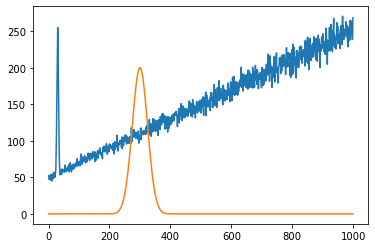

In [142]:
import matplotlib.pyplot as plt

plt.plot(list_erg,list_eff)
plt.plot(list_erg,list_eff2)
plt.show()

Previous fitting method are all wrong, it's hard to fit a non-linear equation. Therefore, we need to use log(y) to linearize the equation.

The first step is evaluate baseline by SNIP method

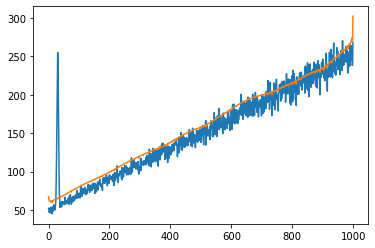

In [143]:
def SNIP(list_eff,m=15):

    list_v=[]
    for i in range(len(list_eff)):
        list_v.append(np.log(np.log((list_eff[i]+1)**0.5+1)+1))

    for p in range(1,m+1):
        for i in range(p,len(list_eff)-p):
            list_v[i]=min(list_v[i],(list_v[i-p]+list_v[i+p])/2)

    list_background=[]
    for i in range(len(list_v)):
        list_background.append((np.exp(np.exp(list_v[i])-1))**2-1)
        
    return list_background

lisst_background=SNIP(list_eff)
plt.plot(list_erg,list_eff,label='origin')
plt.plot(list_erg,lisst_background,label='background')
plt.show()

Maybe the first step is to get a gauss fit function rather than background stripping.

In [177]:
def fit(list_erg,list_eff):
    list_erg0=[2/(list_erg[-1]-list_erg[0])*(erg-list_erg[0])-1 for erg in list_erg]
    list_eff0=[np.log(eff) for eff in list_eff]
    f2=lambda x,y:x*y
    f3=lambda x,y:(x**2-1/3)*y

    s1=sum(list_eff0)/len(list_erg0)
    s2=sum([f2(x,y) for x,y in zip(list_erg0,list_eff0)])/sum([f2(x,x) for x in list_erg0])
    s3=sum([f3(x,y) for x,y in zip(list_erg0,list_eff0)])/sum([f3(x,f3(x,1)) for x in list_erg0])
    k3=s3
    k2=s2
    k1=s1-s3/3
    s2=-0.5/k3
    x0=k2*s2
    A=np.exp(k1+0.5*x0**2/s2)
    s=(s2**0.5)*(list_erg[-1]-list_erg[0])/2
    x0=0.5*(x0+1)*(list_erg[-1]-list_erg[0])+list_erg[0]
    return x0,A,s


300.67611497919575 1970.5069828254054 24.957600952480792


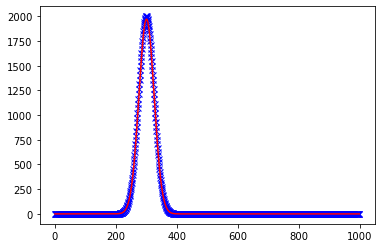

In [185]:

list_eff2,area2=simulate_spe(x0=300,A=2000,s=25,a=0,b=0,c=0.01)
x0,A,s=fit(list_erg,list_eff2)
print(x0,A,s)
list_eff3=simulate_spe(x0,A,s,0,0,0)[0]
plt.plot(list_erg,list_eff2,'bx',label='origin')
plt.plot(list_erg,list_eff3,'r-',label='fit')
plt.show()

In [178]:
list_erg0=[2/(list_erg[-1]-list_erg[0])*(erg-list_erg[0])-1 for erg in list_erg]
list_eff0=[np.log(max(eff,1)) for eff in list_eff]
f2=lambda x,y:x*y
f3=lambda x,y:(x**2-1/3)*y
def K(x):
    k1=sum(list_eff0)/len(list_eff0)
    k2=sum([f2(x,y) for x,y in zip(list_erg0[300-x:301+x],list_eff0[300-x:301+x])])/sum([f2(x,x) for x in list_erg0[300-x:301+x]])
    k3=sum([f3(x,y) for x,y in zip(list_erg0[300-x:301+x],list_eff0[300-x:301+x])])/sum([f3(x,f3(x,1)) for x in list_erg0[300-x:301+x]])
    return k1,k2,k3
for d in range(30,100):
    k1,k2,k3=K(d)
    print(np.exp(k1-k2**2/k3/2))

115.82963338257147
114.89475255608261
113.93531961077807
112.95803318269621
111.97207807820739
110.96205792200767
109.93127207755953
108.8756192749938
107.80684525578326
106.72109475363199
105.60013090010357
104.46956100104076
103.33192647088295
102.19078896927527
101.03524530005826
99.86638173406405
98.6947904780959
97.51210845563712
96.30697844037392
95.1237458732604
93.92680816285372
92.71744617768829
91.50157493925336
90.28793401797853
89.08559689545334
87.87700257988567
86.6767606842973
85.47561548333238
84.28029067610366
83.07932161342
81.87834188835868
80.7104529564534
79.55726036201189
78.35899693163114
77.21885103442054
76.0807953361864
74.94389850459626
73.8311941243384
72.72202542204863
71.64319644458566
70.56368503612723
69.53275796652566
68.50960112976882
67.49182706804778
66.53562214800276
65.57492719007162
64.59396136145116
63.64175738388453
62.76902530053025
61.88737549682063
61.01810347542484
60.21691618184927
59.41564878060512
58.62776337477496
57.90147640859088
57.16